
--- First 5 rows of the dataset: ---
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

--- Missing values in each column: ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Shape of the dataset after dropping missing values: (297, 14)

--- Data typ

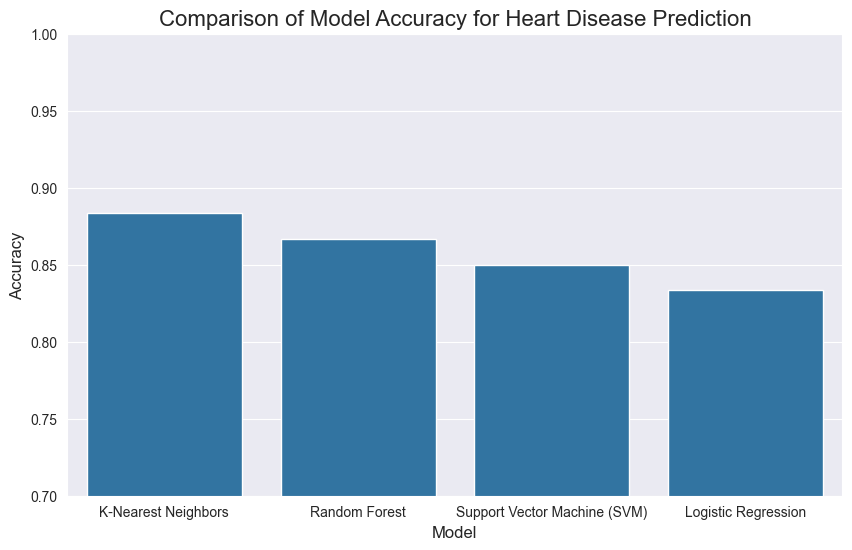

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Import the 4 models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# We will use the processed Cleveland dataset from the UCI Machine Learning Repository.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Define the column names as they are not included in the file
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the data
df = pd.read_csv(url, header=None, names=column_names)

print("\n--- First 5 rows of the dataset: ---")
print(df.head())

# The dataset uses '?' for missing values. Let's replace them with NaN.
df.replace('?', np.nan, inplace=True)

# Check for missing values
print("\n--- Missing values in each column: ---")
print(df.isnull().sum())

# We have a few missing values in 'ca' and 'thal'. A simple strategy is to drop them.
df.dropna(inplace=True)
print(f"\nShape of the dataset after dropping missing values: {df.shape}")

# The 'target' column has values from 0-4. For simplicity (and as is common practice),
# we will convert this into a binary classification problem: 0 = no disease, 1 = disease.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Also, convert object columns to numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

print("\n--- Data types of columns after cleaning: ---")
df.info()

print("\n--- Target value counts: ---")
print(df['target'].value_counts())


# Separate features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale the features. This is important for models like KNN and SVM.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models we want to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

# Loop through the models, train them, and evaluate performance
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# Create a DataFrame from the results for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n--- Final Model Comparison ---")
print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparison of Model Accuracy for Heart Disease Prediction', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0) # Set y-axis limits to better visualize differences

plt.show()